In [615]:
!pip install neurolab
!pip install neupy
! pip install pyrenn

In [617]:
import neurolab as nl
import numpy as np
import numpy.matlib
from neupy import algorithms
from scipy.spatial import distance
import pylab as pl
from sklearn.metrics import mean_squared_error
import pyrenn
import matplotlib.pyplot as plt

### Задание 1
Использовать сеть Элмана для распознавания динамических образов.

In [618]:
p1_k = np.linspace(0, 1, int(1 / 0.025), endpoint=True)

# Основной сигнал
p1 = np.sin(4 * np.pi * p1_k)

t1 = np.ones(len(p1_k)) * (-1)


p2_k = np.linspace(0.92, 4.07, int(4.07 / 0.025), endpoint=True)

# Сигнал, подлежащий распознаванию
p2 = np.cos(-2. * p2_k * p2_k + 7. * p2_k)

t2 = np.ones(len(p2_k))

# Длительность основного сигнала
R = np.array([2, 4, 7])

In [619]:
p2 = p2.reshape(1, p2.shape[0])
t2 = t2.reshape(1, t2.shape[0])

Определяем входное множество

In [620]:

P = np.concatenate((numpy.matlib.repmat(p1, 1, R[0]), p2,
                    numpy.matlib.repmat(p1, 1, R[1]), p2,
                    numpy.matlib.repmat(p1, 1, R[2]), p2), axis=1).reshape(-1, 1)

T = np.concatenate((numpy.matlib.repmat(t1, 1, R[0]), t2,
                    numpy.matlib.repmat(t1, 1, R[1]), t2,
                    numpy.matlib.repmat(t1, 1, R[2]), t2), axis=1).reshape(-1, 1)

In [621]:
P = P.reshape(len(P), 1)
T = T.reshape(len(T), 1)

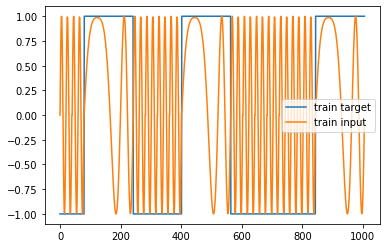

In [623]:
pl.plot(T.reshape(T.shape))
pl.plot(P.reshape(P.shape))
pl.legend(['train target', 'train input'])
pl.show()

In [854]:
net = nl.net.newelm([[-1, 1]], [8, 1], [ nl.trans.TanSig(),nl.trans.TanSig()])

In [855]:
net.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
net.layers[1].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
net.init()

In [862]:
error = net.train(P, T, epochs=10, show=10, goal=0.0001)

Epoch: 10; Error: 0.5949473732635141;
The maximum number of train epochs is reached


In [863]:
output = net.sim(P)

Отобразим на графике этаонные значения и предсказанные сетью.

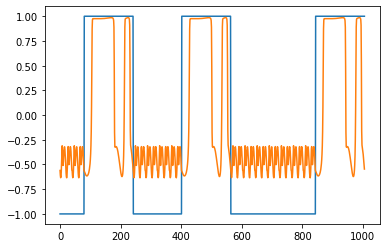

In [864]:
pl.plot(T)
pl.plot(output)

Преобразуем предсказанные значения.

In [865]:
output[output >= 0] = 1.0
output[output < 0] = -1.0

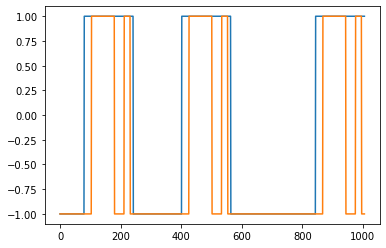

In [866]:
pl.plot(T)
pl.plot(output)

In [877]:
print("Количество точек :", len(T), sep=' ')
print("Количество правильно классифицированных точек :", (output == T).sum(), sep = ' ')
print("Accuracy: ", (output == T).sum() / len(T))

Количество точек : 1006
Количество правильно классифицированных точек : 808
Accuracy:  0.8031809145129225


Для проверки качества распознавания сформируем новое обучающее множество, изменив одно из значений R.

In [869]:
p1_k = np.linspace(0, 1, int(1 / 0.025), endpoint=True)

# Основной сигнал
p1 = np.sin(4 * np.pi * p1_k)

t1 = np.ones(len(p1_k)) * (-1)


p2_k = np.linspace(0.92, 4.07, int(4.07 / 0.025), endpoint=True)

# Сигнал, подлежащий распознаванию
p2 = np.cos(-2. * p2_k * p2_k + 7. * p2_k)

t2 = np.ones(len(p2_k))

# Длительность основного сигнала
R = np.array([2,4,12])

In [870]:
p2 = p2.reshape(1, p2.shape[0])
t2 = t2.reshape(1, t2.shape[0])

P2 = np.concatenate((numpy.matlib.repmat(p1, 1, R[0]), p2,
                    numpy.matlib.repmat(p1, 1, R[1]), p2,
                    numpy.matlib.repmat(p1, 1, R[2]), p2), axis=1).reshape(-1, 1)

T2 = np.concatenate((numpy.matlib.repmat(t1, 1, R[0]), t2,
                    numpy.matlib.repmat(t1, 1, R[1]), t2,
                    numpy.matlib.repmat(t1, 1, R[2]), t2), axis=1).reshape(-1, 1)

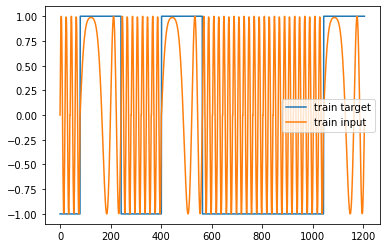

In [871]:
pl.plot(T2.reshape(T2.shape[0]))
pl.plot(P2.reshape(P2.shape[0]))
pl.legend(['train target', 'train input'])
pl.show()

In [872]:
# Simulate network
output2 = net.sim(P2)

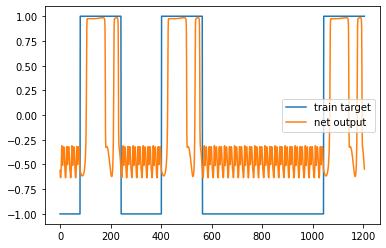

In [873]:
pl.plot(T2.reshape(T2.shape[0]))
pl.plot(output2.reshape(output2.shape[0]))
pl.legend(['train target', 'net output'])
pl.show()

In [874]:
output2[output2 >= 0] = 1.0
output2[output2 < 0] = -1.0

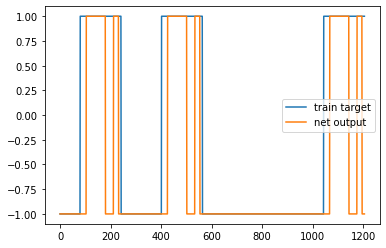

In [875]:
pl.plot(T2.reshape(T2.shape[0]))
pl.plot(output2.reshape(output2.shape[0]))
pl.legend(['train target', 'net output'])
pl.show()

In [878]:
print("Количество точек :", len(T2), sep=' ')
print("Количество правильно классифицированных точек :", (output2 == T2).sum(), sep = ' ')
print("Accuracy: ", (output2 == T2).sum() / len(T2))

Количество точек : 1206
Количество правильно классифицированных точек : 1008
Accuracy:  0.835820895522388


### Задание 2

Использовать сеть Хопфилда для распознавания статических образов.

Формируем входные данные для сети Хопфилда

Цветам точек соответствуют 0 и 1.

In [759]:
zero = np.matrix([
               0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
               0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
               0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
               0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
               0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
               0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
       
one = np.matrix([
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
                0, 0, 0, 1, 1, 1, 1, 0, 0, 0])
       
two = np.matrix([
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0])
    
three = np.matrix([
                0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
                0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
                0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 0, 1, 1, 1, 1, 1, 1, 0, 0])
       
four = np.matrix([
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

six = np.matrix([
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
                1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
                1, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
                1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
                1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
                1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 0, 0, 0, 0])
       
nine = np.matrix([
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
                0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [760]:
data = np.concatenate([one, six, four], axis=0)
Four = four
dhnet = algorithms.DiscreteHopfieldNetwork(mode = 'async', n_times = 600)
dhnet.train(data)

Подаем в сеть первый образ.

In [742]:
def DrawBinImage(img):
    for row in img.tolist():
        print(' '.join(' *'[val] for val in row))

In [743]:
DrawBinImage(one.reshape(12,10))

      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      


In [744]:
result = dhnet.predict(one)

In [745]:
DrawBinImage(result.reshape(12, 10))

      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      


In [746]:
Six = six
def Noise(img, noisePercent):
    limit = img.shape[1]
    tmp = img.T
    
    for i in range(noisePercent):
        pos = np.random.randint(1, limit, 1)[0]
        tmp[pos] *= 0
    res = tmp.T
    return res

Зашумление второго образа на 20%

In [747]:
noiseSix = Noise(six, 20)

DrawBinImage(noiseSix.reshape(12, 10))

* * * * * *        
* * * * * *        
* *                
* *                
* * * * * *        
* * * * * *        
*       * *        
*       * *        
* *                
* *     * *        
* *   * * *        
  * * * *          


Подаем второй зашумленный образ в сеть

In [748]:
result2 = dhnet.predict(noiseSix)
DrawBinImage(result2.reshape(12, 10))

* * * * * *        
* * * * * *        
* *                
* *                
* * * * * *        
* * * * * *        
* *     * *        
* *     * *        
* *     * *        
* *     * *        
* * * * * *        
* * * * * *        


Зашумление третьего образа на 30%

In [749]:
noiseFour = Noise(four, 30)
DrawBinImage(noiseFour.reshape(12, 10))

  *             *  
  * *         * *  
  *           *    
  * *           *  
  * *         * *  
  * * *   * * * *  
  *   * * * * * *  
              * *  
                *  
              *    
                   
              * *  


In [750]:
result3 = dhnet.predict(noiseFour)
DrawBinImage(result3.reshape(12, 10))

  * *         * *  
  * *         * *  
  * *         * *  
  * *         * *  
  * *         * *  
  * * * * * * * *  
  * * * * * * * *  
              * *  
              * *  
              * *  
              * *  
              * *  


### Задание 3
Использовать сеть Хэмминга для распознавания статических образов.

In [751]:
zero = np.array([
               -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
               -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
               -1, -1, 1, 1, 1, 1, 1, 1, -1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, -1, 1, 1, 1, 1, 1, 1, -1, -1,
               -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
               -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
       
one = np.array([
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1])
       
two = np.array([
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1])
    
three = np.array([
                -1, -1, 1, 1, 1, 1, 1, 1, -1, -1,
                -1, -1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, 1, 1, 1, 1, -1, -1,
                -1, -1, -1, -1, 1, 1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, -1, 1, 1, 1, 1, 1, 1, -1, -1])
       
four = np.array([
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, 1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1])

six = np.array([
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1,
                1, -1, -1, -1, -1, -1, -1, -1, -1, 1,
                1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1])
       
nine = np.array([
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, -1, -1, -1, -1, 1, 1,
                -1, -1, -1, -1, -1, -1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1])


Q = 7
Patterns = np.array([zero, one, two, three, four, six, nine])
eps = 1 / (Q - 1)

Result = 10 * 12

IW = np.array([zero.T, one.T, two.T, three.T, four.T, six.T, nine.T])
b = Result * np.ones((Q, 1))

a = np.zeros((Q, Q))
for i in range(Q):
    a[i] = IW[i] @ Patterns[i] + b[i]

In [752]:
LW = np.eye(Q)
LW[LW == 0.0] = -eps
LW

array([[ 1.        , -0.16666667, -0.16666667, -0.16666667, -0.16666667,
        -0.16666667, -0.16666667],
       [-0.16666667,  1.        , -0.16666667, -0.16666667, -0.16666667,
        -0.16666667, -0.16666667],
       [-0.16666667, -0.16666667,  1.        , -0.16666667, -0.16666667,
        -0.16666667, -0.16666667],
       [-0.16666667, -0.16666667, -0.16666667,  1.        , -0.16666667,
        -0.16666667, -0.16666667],
       [-0.16666667, -0.16666667, -0.16666667, -0.16666667,  1.        ,
        -0.16666667, -0.16666667],
       [-0.16666667, -0.16666667, -0.16666667, -0.16666667, -0.16666667,
         1.        , -0.16666667],
       [-0.16666667, -0.16666667, -0.16666667, -0.16666667, -0.16666667,
        -0.16666667,  1.        ]])

In [753]:
network = nl.net.newhop(a, max_init=600)

network.layers[0].np['w'][:] = LW
network.layers[0].np['b'][:] = 0

In [754]:
A = IW @ one + b
A

array([[144., 240., 132., 140.,  84., 136., 136.],
       [144., 240., 132., 140.,  84., 136., 136.],
       [144., 240., 132., 140.,  84., 136., 136.],
       [144., 240., 132., 140.,  84., 136., 136.],
       [144., 240., 132., 140.,  84., 136., 136.],
       [144., 240., 132., 140.,  84., 136., 136.],
       [144., 240., 132., 140.,  84., 136., 136.]])

In [755]:
res = network.sim(A)

In [756]:
answerClass = np.argmax(res[0])
print('Result class: {}'.format(answerClass))

Result class: 1


In [757]:
check = Patterns[answerClass]
check[check == -1] = 0
DrawBinImage(check.reshape(12, 10))

      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      
      * * * *      


Зашумленный на 20% второй образ

In [726]:
noiseSixHam = np.asarray(noiseSix)[0]
noiseSixHam[noiseSixHam == 0] = -1

In [739]:
A = IW @ noiseSixHam + b
res = network.sim(A)

answerClass = np.argmax(res[0])
print('Result class: {}'.format(answerClass))

check = Patterns[answerClass]
check[check == -1] = 0
DrawBinImage(check.reshape(12, 10))

Result class: 6
* * * * * *        
* * * * * *        
* *                
* *                
* * * * * *        
* * * * * *        
* *     * *        
* *     * *        
* *     * *        
* *     * *        
* * * * * *        
* * * * * *        


Зашумленный на 30% третий образ

In [728]:
noiseFourHam = np.asarray(noiseFour)[0]
noiseFourHam[noiseFourHam == 0] = -1

In [762]:

A = IW @ noiseFourHam + b
res = network.sim(A)

answerClass = np.argmax(res[0])
print('Result class: {}'.format(answerClass))

check = Patterns[answerClass]
check[check == -1] = 0
DrawBinImage(check.reshape(12, 10))

Result class: 4
  * *         * *  
  * *         * *  
  * *         * *  
  * *         * *  
  * *         * *  
  * * * * * * * *  
  * * * * * * * *  
              * *  
              * *  
              * *  
              * *  
              * *  
